# Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data

In [3]:
# Load the dataset
input_file = '../data/cleaned/cleaned_data.csv'
output_file = 'q2_data.csv'

# Read the CSV file
df = pd.read_csv(input_file, header=None)

# Extract necessary columns
columns_to_extract = [5, 7, 11]  # subject_race, arrest_made, and search_conducted
filtered_data = df[columns_to_extract].dropna(subset=[5])  # Make sure subject_race is not NA

# Rename columns for better readability
filtered_data.columns = ['race', 'arrest_made', 'search_conducted']

# Fill missing values in arrest_made and search_conducted with False
filtered_data['arrest_made'] = filtered_data['arrest_made'].infer_objects(copy=False).astype(bool)
filtered_data['search_conducted'] = filtered_data['search_conducted'].infer_objects(copy=False).astype(bool)

# Save the cleaned data to a new CSV file
filtered_data.to_csv(output_file, index=False)
print(f"Filtered and processed data saved to {output_file}")

Filtered and processed data saved to q2_data.csv


In [4]:
# Read back the output file to verify
output_df = pd.read_csv(output_file)
print("Contents of the output file:")
print(output_df.head())

Contents of the output file:
       race  arrest_made  search_conducted
0     white        False             False
1     black        False             False
2  hispanic        False             False
3  hispanic        False             False
4  hispanic        False             False


# Analyze

### Analyze and compare data between races

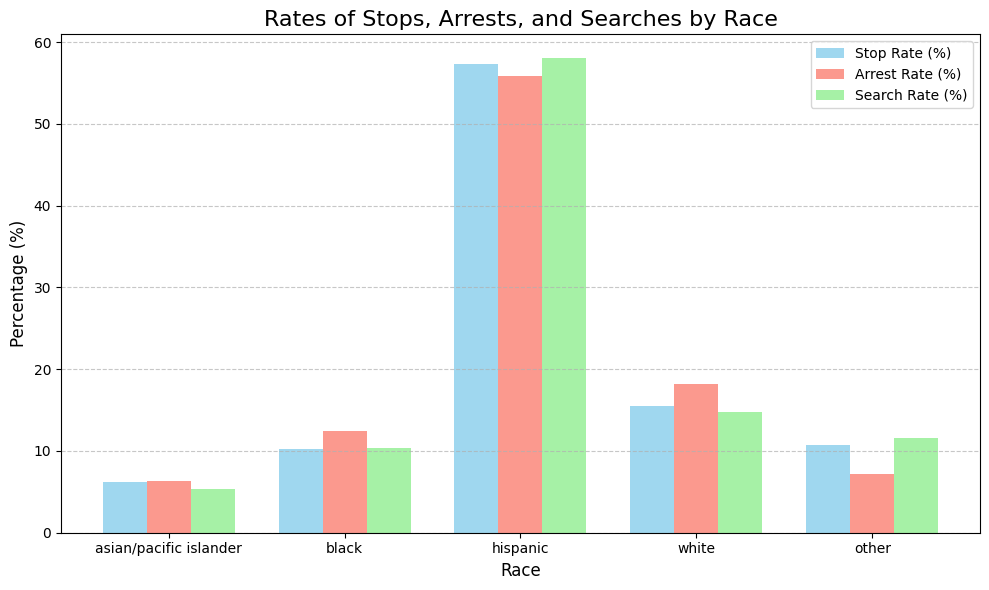

In [5]:
# Load the cleaned dataset
input_file = 'q2_data.csv'
data = pd.read_csv(input_file)

# The order that will display on graphs
race_order = ['asian/pacific islander', 'black', 'hispanic', 'white', 'other']

# Analyze stop rates by race
stop_counts = data['race'].value_counts()
total_stops = len(data)
stop_rates = (stop_counts / total_stops) * 100

# Analyze arrest rates by race
arrest_counts = data[data['arrest_made']].groupby('race')['arrest_made'].count()
total_arrests = arrest_counts.sum()  # Total arrests for all races
arrest_rates = (arrest_counts / total_arrests) * 100

# Analyze search rates by race
search_counts = data[data['search_conducted']].groupby('race')['search_conducted'].count()
total_searches = search_counts.sum()  # Total searches for all races
search_rates = (search_counts / total_searches) * 100

# Combine all data into a DataFrame for better visualization
race_data = pd.DataFrame({
    'Stop Rate (%)': stop_rates,
    'Arrest Rate (%)': arrest_rates,
    'Search Rate (%)': search_rates
})

race_data = race_data.loc[race_order]

# Visualize the data in one graph
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.25

stop_color = 'skyblue'
arrest_color = 'salmon'
search_color = 'lightgreen'

x = range(len(race_order))

ax.bar([i - width for i in x], race_data['Stop Rate (%)'], width, label='Stop Rate (%)', color=stop_color, alpha=0.8)
ax.bar(x, race_data['Arrest Rate (%)'], width, label='Arrest Rate (%)', color=arrest_color, alpha=0.8)
ax.bar([i + width for i in x], race_data['Search Rate (%)'], width, label='Search Rate (%)', color=search_color, alpha=0.8)

ax.set_title("Rates of Stops, Arrests, and Searches by Race", fontsize=16)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_xlabel("Race", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(race_order)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Analyze data for each race

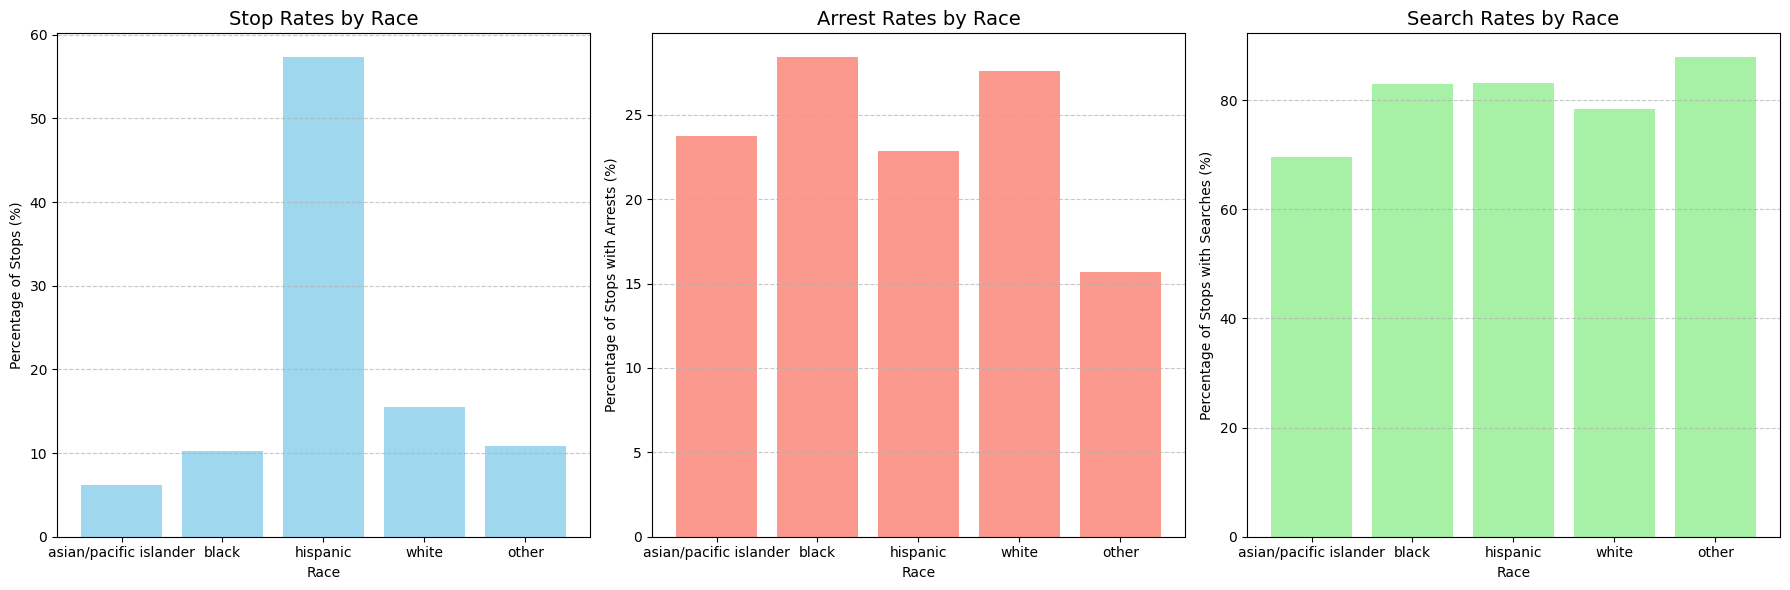

In [6]:
# Calculate stop, arrest, and search counts by race
stop_counts = filtered_data['race'].value_counts()
arrest_counts = filtered_data.groupby('race')['arrest_made'].sum()
search_counts = filtered_data.groupby('race')['search_conducted'].sum()

# Calculate rates as percentages
stop_rates = (stop_counts / stop_counts.sum()) * 100
arrest_rates = (arrest_counts / stop_counts) * 100
search_rates = (search_counts / stop_counts) * 100

# Reorder the indices to match the desired race order
stop_rates = stop_rates[race_order]
arrest_rates = arrest_rates[race_order]
search_rates = search_rates[race_order]

# Visualize the data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Stop Rates by Race
axes[0].bar(stop_rates.index, stop_rates, color='skyblue', alpha=0.8)
axes[0].set_title("Stop Rates by Race", fontsize=14)
axes[0].set_ylabel("Percentage of Stops (%)")
axes[0].set_xlabel("Race")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Arrest Rates by Race
axes[1].bar(arrest_rates.index, arrest_rates, color='salmon', alpha=0.8)
axes[1].set_title("Arrest Rates by Race", fontsize=14)
axes[1].set_ylabel("Percentage of Stops with Arrests (%)")
axes[1].set_xlabel("Race")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Search Rates by Race
axes[2].bar(search_rates.index, search_rates, color='lightgreen', alpha=0.8)
axes[2].set_title("Search Rates by Race", fontsize=14)
axes[2].set_ylabel("Percentage of Stops with Searches (%)")
axes[2].set_xlabel("Race")
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()